# Google Play Store Apps - Data Analysis Project
## Notebook 6: Final Report and Visualization Dashboard

### 1. Setup and Load All Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Load data
df_apps = pd.read_csv('apps_cleaned.csv')
df_reviews = pd.read_csv('reviews_cleaned.csv')

print("="*70)
print("GOOGLE PLAY STORE APPS ANALYSIS - FINAL REPORT")
print("="*70)
print(f"\nAnalysis Date: {datetime.now().strftime('%Y-%m-%d')}")
print(f"Total Apps Analyzed: {len(df_apps):,}")
print(f"Total Reviews Analyzed: {len(df_reviews):,}")
print("="*70)


GOOGLE PLAY STORE APPS ANALYSIS - FINAL REPORT

Analysis Date: 2025-11-25
Total Apps Analyzed: 8,196
Total Reviews Analyzed: 20,375


### 2. Executive Summary Dashboard

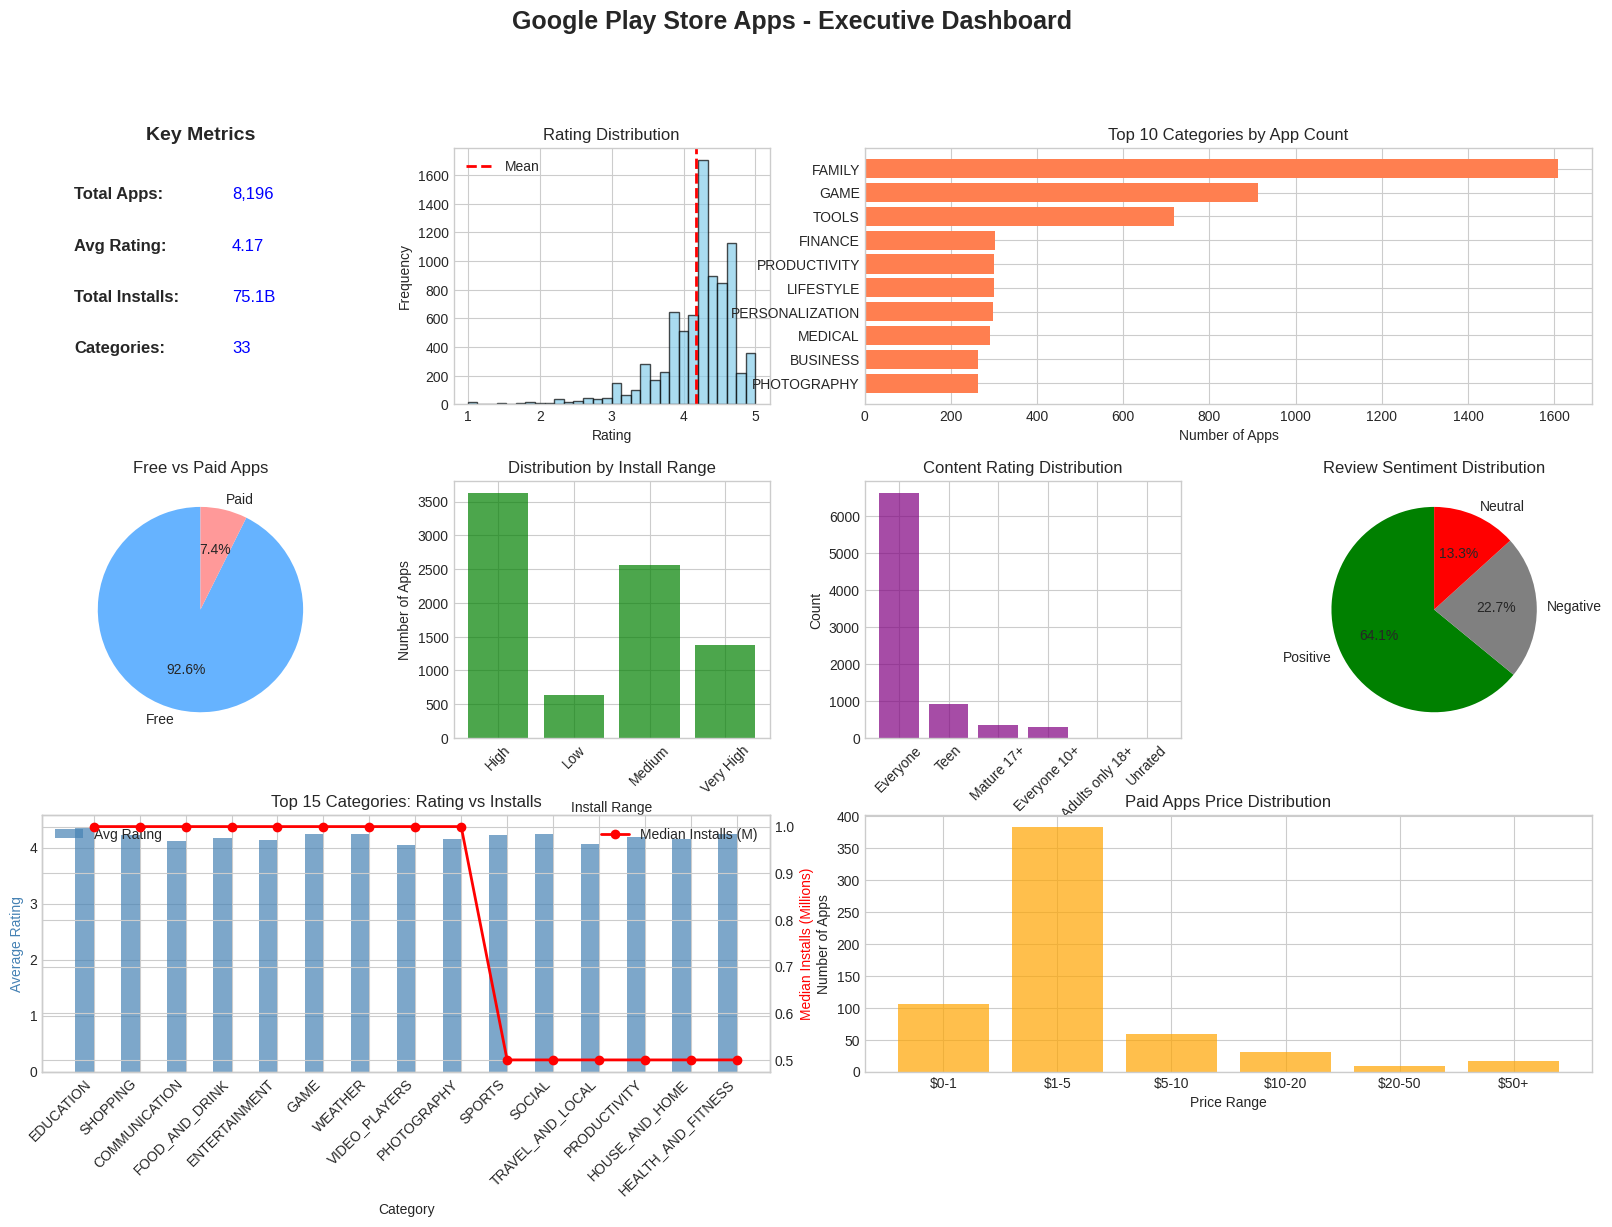

✓ Executive Dashboard created and saved as 'executive_dashboard.png'


In [2]:
# Create comprehensive dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

# 1. Key Metrics
ax1 = fig.add_subplot(gs[0, 0])
metrics = {
    'Total Apps': f"{len(df_apps):,}",
    'Avg Rating': f"{df_apps['Rating'].mean():.2f}",
    'Total Installs': f"{df_apps['Installs'].sum()/1e9:.1f}B",
    'Categories': f"{df_apps['Category'].nunique()}"
}
ax1.axis('off')
y_pos = 0.8
for key, value in metrics.items():
    ax1.text(0.1, y_pos, f"{key}:", fontsize=12, weight='bold')
    ax1.text(0.6, y_pos, value, fontsize=12, color='blue')
    y_pos -= 0.2
ax1.set_title('Key Metrics', fontsize=14, weight='bold')

# 2. Rating Distribution
ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(df_apps['Rating'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax2.axvline(df_apps['Rating'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
ax2.set_xlabel('Rating')
ax2.set_ylabel('Frequency')
ax2.set_title('Rating Distribution')
ax2.legend()

# 3. Top Categories
ax3 = fig.add_subplot(gs[0, 2:])
top_cats = df_apps['Category'].value_counts().head(10)
ax3.barh(range(len(top_cats)), top_cats.values, color='coral')
ax3.set_yticks(range(len(top_cats)))
ax3.set_yticklabels(top_cats.index)
ax3.set_xlabel('Number of Apps')
ax3.set_title('Top 10 Categories by App Count')
ax3.invert_yaxis()

# 4. Free vs Paid Distribution
ax4 = fig.add_subplot(gs[1, 0])
type_counts = df_apps['Type'].value_counts()
colors_pie = ['#66b3ff', '#ff9999']
ax4.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%',
        colors=colors_pie, startangle=90)
ax4.set_title('Free vs Paid Apps')

# 5. Install Distribution
ax5 = fig.add_subplot(gs[1, 1])
install_ranges = df_apps['Install_Range'].value_counts().sort_index()
ax5.bar(install_ranges.index, install_ranges.values, color='green', alpha=0.7)
ax5.set_xlabel('Install Range')
ax5.set_ylabel('Number of Apps')
ax5.set_title('Distribution by Install Range')
ax5.tick_params(axis='x', rotation=45)

# 6. Content Rating Distribution
ax6 = fig.add_subplot(gs[1, 2])
content_counts = df_apps['Content Rating'].value_counts().head(6)
ax6.bar(content_counts.index, content_counts.values, color='purple', alpha=0.7)
ax6.set_xlabel('Content Rating')
ax6.set_ylabel('Count')
ax6.set_title('Content Rating Distribution')
ax6.tick_params(axis='x', rotation=45)

# 7. Sentiment Distribution
ax7 = fig.add_subplot(gs[1, 3])
sentiment_counts = df_reviews['Sentiment'].value_counts()
colors_sent = ['green', 'gray', 'red']
ax7.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=colors_sent, startangle=90)
ax7.set_title('Review Sentiment Distribution')

# 8. Category Performance (Rating vs Installs)
ax8 = fig.add_subplot(gs[2, :2])
cat_performance = df_apps.groupby('Category').agg({
    'Rating': 'mean',
    'Installs': 'median'
}).sort_values('Installs', ascending=False).head(15)

x_pos = np.arange(len(cat_performance))
ax8_twin = ax8.twinx()

bars = ax8.bar(x_pos - 0.2, cat_performance['Rating'], 0.4,
               label='Avg Rating', color='steelblue', alpha=0.7)
lines = ax8_twin.plot(x_pos, cat_performance['Installs']/1e6, 'ro-',
                      label='Median Installs (M)', linewidth=2, markersize=6)

ax8.set_xlabel('Category')
ax8.set_ylabel('Average Rating', color='steelblue')
ax8_twin.set_ylabel('Median Installs (Millions)', color='red')
ax8.set_xticks(x_pos)
ax8.set_xticklabels(cat_performance.index, rotation=45, ha='right')
ax8.set_title('Top 15 Categories: Rating vs Installs')
ax8.legend(loc='upper left')
ax8_twin.legend(loc='upper right')

# 9. Price Analysis
ax9 = fig.add_subplot(gs[2, 2:])
paid_apps = df_apps[df_apps['Price'] > 0]
price_ranges = pd.cut(paid_apps['Price'], bins=[0, 1, 5, 10, 20, 50, 400],
                     labels=['$0-1', '$1-5', '$5-10', '$10-20', '$20-50', '$50+'])
price_dist = price_ranges.value_counts().sort_index()
ax9.bar(range(len(price_dist)), price_dist.values, color='orange', alpha=0.7)
ax9.set_xticks(range(len(price_dist)))
ax9.set_xticklabels(price_dist.index)
ax9.set_xlabel('Price Range')
ax9.set_ylabel('Number of Apps')
ax9.set_title('Paid Apps Price Distribution')

plt.suptitle('Google Play Store Apps - Executive Dashboard', fontsize=18, weight='bold', y=0.995)
plt.savefig('executive_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Executive Dashboard created and saved as 'executive_dashboard.png'")


### 3. Detailed Category Analysis Report

In [4]:
# Comprehensive category analysis
category_report = df_apps.groupby('Category').agg({
    'App': 'count',
    'Rating': ['mean', 'std'],
    'Reviews': ['sum', 'median'],
    'Installs': ['sum', 'median'],
    'Price': 'mean',
    'Size': 'median'
}).round(2)

category_report.columns = ['App_Count', 'Avg_Rating', 'Rating_Std',
                           'Total_Reviews', 'Median_Reviews',
                           'Total_Installs', 'Median_Installs',
                           'Avg_Price', 'Median_Size']

# Calculate success rate per category
category_success = df_apps.groupby('Category').apply(
    lambda x: ((x['Rating'] > 4.0) & (x['Installs'] > 1000000)).mean() * 100
).round(2)
category_report['Success_Rate_%'] = category_success

# Sort by total installs
category_report = category_report.sort_values('Total_Installs', ascending=False)

print("\n" + "="*70)
print("DETAILED CATEGORY ANALYSIS")
print("="*70)
print("\nTop 15 Categories by Total Installs:")
print(category_report.head(15).to_string())

# Export to Excel
category_report.to_excel('category_analysis_report.xlsx')
print("\n✓ Category report exported to 'category_analysis_report.xlsx'")



DETAILED CATEGORY ANALYSIS

Top 15 Categories by Total Installs:
                     App_Count  Avg_Rating  Rating_Std  Total_Reviews  Median_Reviews  Total_Installs  Median_Installs  Avg_Price  Median_Size  Success_Rate_%
Category                                                                                                                                                      
GAME                       912        4.25        0.38    622295937.0         32840.0    1.387876e+10        1000000.0       0.30        39.00           38.60
COMMUNICATION              256        4.12        0.47    285810907.0         15161.5    1.103824e+10        1000000.0       0.22         5.90           32.81
TOOLS                      718        4.04        0.62    229355702.0          1037.5    7.999724e+09         100000.0       0.29         4.10           19.36
PRODUCTIVITY               301        4.18        0.53     55590391.0          6752.0    5.793070e+09         500000.0       0.24         6

### 4. Success Factors Analysis


SUCCESS FACTORS ANALYSIS

1. Success Comparison Metrics:
             Rating         Reviews               Size Price    Installs             
               mean   std    median        mean median  mean      median         mean
Unsuccessful   4.12  0.58     831.0    28250.34   11.0   1.3    100000.0   1709294.29
Successful     4.39  0.17  258717.0  1151063.40   26.0   0.0  10000000.0  38587809.29

2. Success Rate by Type:
Type
Free    21.80
Paid     0.33
Name: Success, dtype: float64

3. Success Rate by Content Rating:
Content Rating
Teen               29.39
Everyone 10+       28.52
Mature 17+         19.61
Everyone           18.62
Adults only 18+     0.00
Unrated             0.00
Name: Success, dtype: float64

4. Success Rate by Price Category:
Price_Category
Free         21.80
Premium       1.11
Budget        0.20
Expensive     0.00
Name: Success, dtype: float64


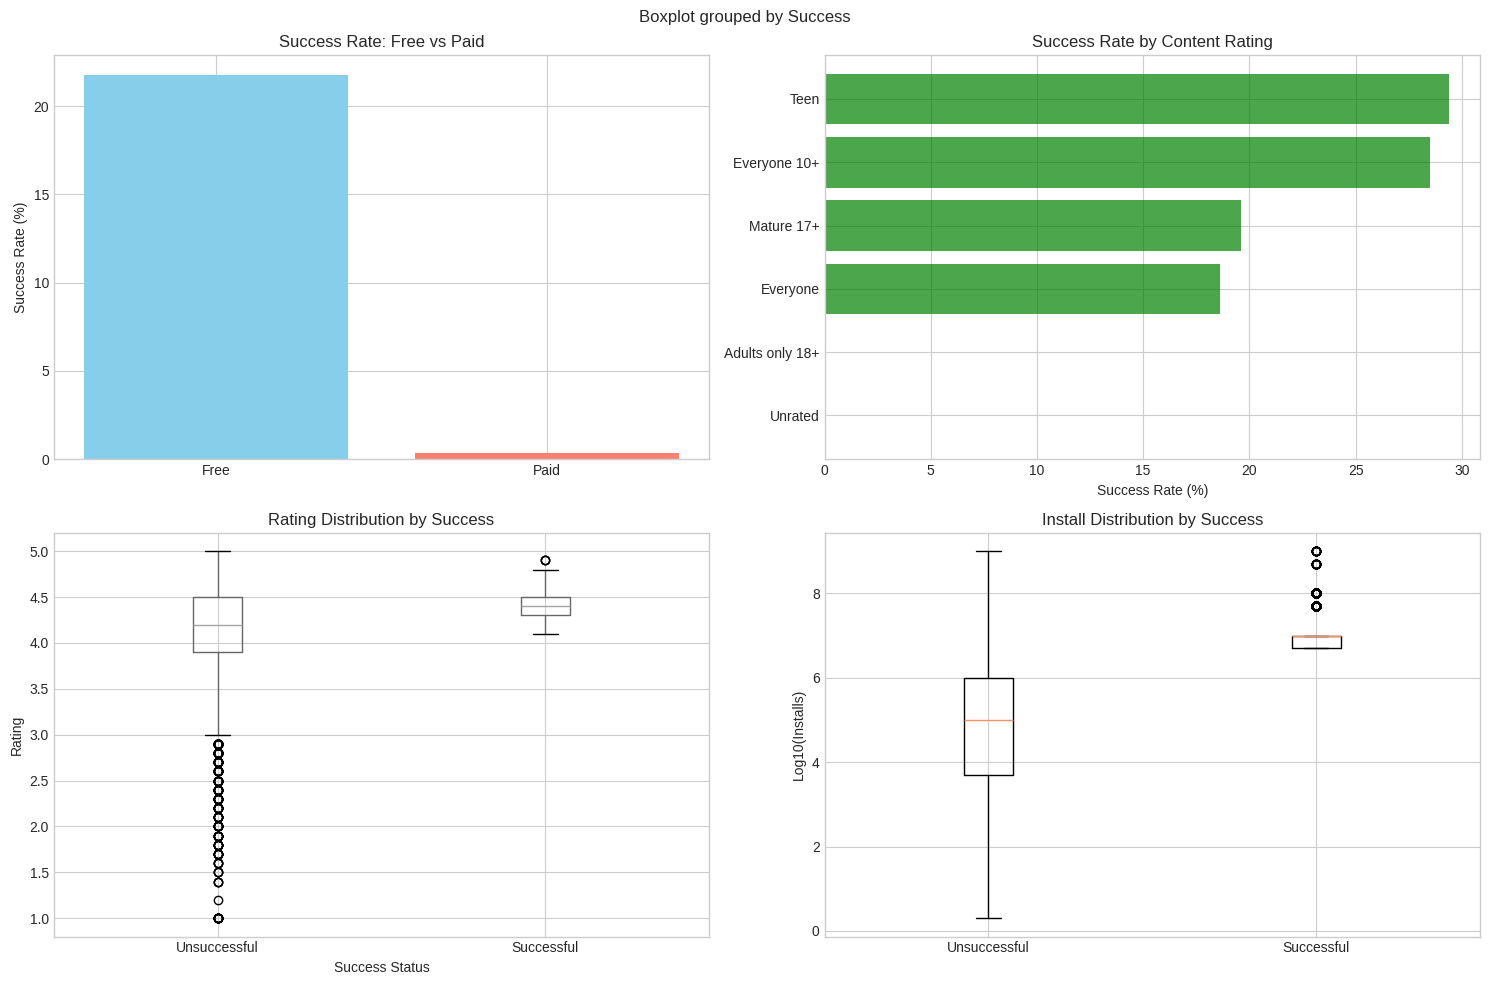


✓ Success factors visualization saved as 'success_factors_analysis.png'


In [5]:
print("\n" + "="*70)
print("SUCCESS FACTORS ANALYSIS")
print("="*70)

# Define success
df_apps['Success'] = ((df_apps['Rating'] > 4.0) & (df_apps['Installs'] > 1000000)).astype(int)

# Compare successful vs unsuccessful apps
success_comparison = df_apps.groupby('Success').agg({
    'Rating': ['mean', 'std'],
    'Reviews': ['median', 'mean'],
    'Size': 'median',
    'Price': 'mean',
    'Installs': ['median', 'mean']
}).round(2)

success_comparison.index = ['Unsuccessful', 'Successful']
print("\n1. Success Comparison Metrics:")
print(success_comparison.to_string())

# Success rate by key factors
print("\n2. Success Rate by Type:")
type_success = df_apps.groupby('Type')['Success'].mean() * 100
print(type_success.round(2))

print("\n3. Success Rate by Content Rating:")
content_success = df_apps.groupby('Content Rating')['Success'].mean() * 100
print(content_success.sort_values(ascending=False).round(2))

print("\n4. Success Rate by Price Category:")
price_success = df_apps.groupby('Price_Category')['Success'].mean() * 100
print(price_success.sort_values(ascending=False).round(2))

# Visualize success factors
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Success by type
axes[0, 0].bar(type_success.index, type_success.values, color=['skyblue', 'salmon'])
axes[0, 0].set_ylabel('Success Rate (%)')
axes[0, 0].set_title('Success Rate: Free vs Paid')

# Success by content rating
top_content = content_success.sort_values(ascending=False).head(6)
axes[0, 1].barh(range(len(top_content)), top_content.values, color='green', alpha=0.7)
axes[0, 1].set_yticks(range(len(top_content)))
axes[0, 1].set_yticklabels(top_content.index)
axes[0, 1].set_xlabel('Success Rate (%)')
axes[0, 1].set_title('Success Rate by Content Rating')
axes[0, 1].invert_yaxis()

# Rating distribution by success
df_apps.boxplot(column='Rating', by='Success', ax=axes[1, 0])
axes[1, 0].set_xticklabels(['Unsuccessful', 'Successful'])
axes[1, 0].set_xlabel('Success Status')
axes[1, 0].set_ylabel('Rating')
axes[1, 0].set_title('Rating Distribution by Success')
plt.sca(axes[1, 0])
plt.xticks(rotation=0)

# Installs distribution by success
success_installs = df_apps.groupby('Success')['Installs'].apply(lambda x: np.log10(x+1))
axes[1, 1].boxplot([success_installs[0], success_installs[1]], labels=['Unsuccessful', 'Successful'])
axes[1, 1].set_ylabel('Log10(Installs)')
axes[1, 1].set_title('Install Distribution by Success')

plt.tight_layout()
plt.savefig('success_factors_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Success factors visualization saved as 'success_factors_analysis.png'")


### 5. Market Opportunity Report


MARKET OPPORTUNITY ANALYSIS

Top 15 Market Opportunities:
                    App_Count  Median_Installs  Avg_Rating  Opportunity_Score
Category                                                                     
WEATHER                    72        1000000.0        4.24              94.63
EDUCATION                 118        1000000.0        4.36              94.23
FOOD_AND_DRINK             94        1000000.0        4.17              93.80
ENTERTAINMENT             102        1000000.0        4.14              93.48
SHOPPING                  180        1000000.0        4.23              92.23
VIDEO_PLAYERS             148        1000000.0        4.04              91.98
PHOTOGRAPHY               263        1000000.0        4.16              90.08
COMMUNICATION             256        1000000.0        4.12              90.03
GAME                      912        1000000.0        4.25              76.40
HOUSE_AND_HOME             62         500000.0        4.15              74.40
SOCIA

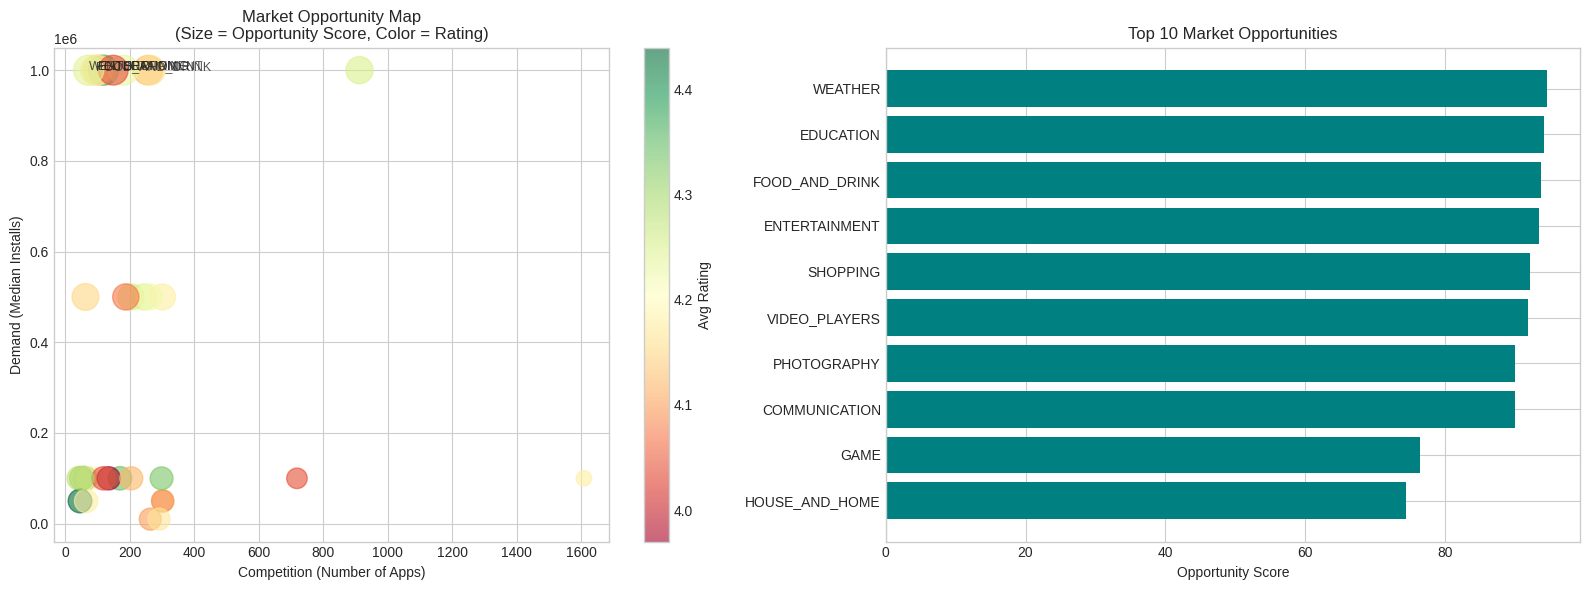


✓ Market opportunities report exported to 'market_opportunities_report.xlsx'


In [6]:
print("\n" + "="*70)
print("MARKET OPPORTUNITY ANALYSIS")
print("="*70)

# Calculate opportunity scores
market_data = df_apps.groupby('Category').agg({
    'App': 'count',
    'Installs': 'median',
    'Rating': 'mean',
    'Price': 'mean'
}).round(2)

market_data.columns = ['App_Count', 'Median_Installs', 'Avg_Rating', 'Avg_Price']

# Normalize metrics
market_data['Demand_Score'] = (market_data['Median_Installs'] / market_data['Median_Installs'].max() * 100)
market_data['Competition_Score'] = (1 - market_data['App_Count'] / market_data['App_Count'].max()) * 100
market_data['Quality_Score'] = (market_data['Avg_Rating'] / 5) * 100

# Overall opportunity score
market_data['Opportunity_Score'] = (
    market_data['Demand_Score'] * 0.4 +
    market_data['Competition_Score'] * 0.35 +
    market_data['Quality_Score'] * 0.25
).round(2)

# Sort by opportunity score
market_opportunities = market_data.sort_values('Opportunity_Score', ascending=False)

print("\nTop 15 Market Opportunities:")
print(market_opportunities.head(15)[['App_Count', 'Median_Installs', 'Avg_Rating', 'Opportunity_Score']].to_string())

# Visualize opportunities
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot: Competition vs Demand
scatter = axes[0].scatter(market_data['App_Count'],
                         market_data['Median_Installs'],
                         s=market_data['Opportunity_Score']*5,
                         c=market_data['Avg_Rating'],
                         cmap='RdYlGn', alpha=0.6)

# Annotate top 5 opportunities
for cat in market_opportunities.head(5).index:
    axes[0].annotate(cat,
                    (market_data.loc[cat, 'App_Count'],
                     market_data.loc[cat, 'Median_Installs']),
                    fontsize=9, alpha=0.8)

axes[0].set_xlabel('Competition (Number of Apps)')
axes[0].set_ylabel('Demand (Median Installs)')
axes[0].set_title('Market Opportunity Map\n(Size = Opportunity Score, Color = Rating)')
plt.colorbar(scatter, ax=axes[0], label='Avg Rating')

# Top opportunities bar chart
top_10_opp = market_opportunities.head(10)
axes[1].barh(range(len(top_10_opp)), top_10_opp['Opportunity_Score'], color='teal')
axes[1].set_yticks(range(len(top_10_opp)))
axes[1].set_yticklabels(top_10_opp.index)
axes[1].set_xlabel('Opportunity Score')
axes[1].set_title('Top 10 Market Opportunities')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('market_opportunities.png', dpi=300, bbox_inches='tight')
plt.show()

# Export opportunities
market_opportunities.to_excel('market_opportunities_report.xlsx')
print("\n✓ Market opportunities report exported to 'market_opportunities_report.xlsx'")


### 6. Sentiment Analysis Summary


SENTIMENT ANALYSIS SUMMARY

1. Overall Sentiment Distribution:
   Positive: 13,052 (64.06%)
   Negative: 4,617 (22.66%)
   Neutral: 2,705 (13.28%)

2. Sentiment Metrics:
   Average Polarity: 0.182
   Average Subjectivity: 0.494

3. Top 10 Categories by Positive Sentiment:
                    Sentiment_Polarity  Sentiment_Subjectivity  Rating
Category                                                              
EVENTS                           0.503                   0.562   4.000
COMICS                           0.450                   0.571   4.311
FOOD_AND_DRINK                   0.337                   0.563   4.346
BUSINESS                         0.327                   0.477   4.352
WEATHER                          0.318                   0.500   4.349
AUTO_AND_VEHICLES                0.308                   0.537   4.561
EDUCATION                        0.303                   0.513   4.236
HEALTH_AND_FITNESS               0.295                   0.514   4.408
LIFESTYLE       

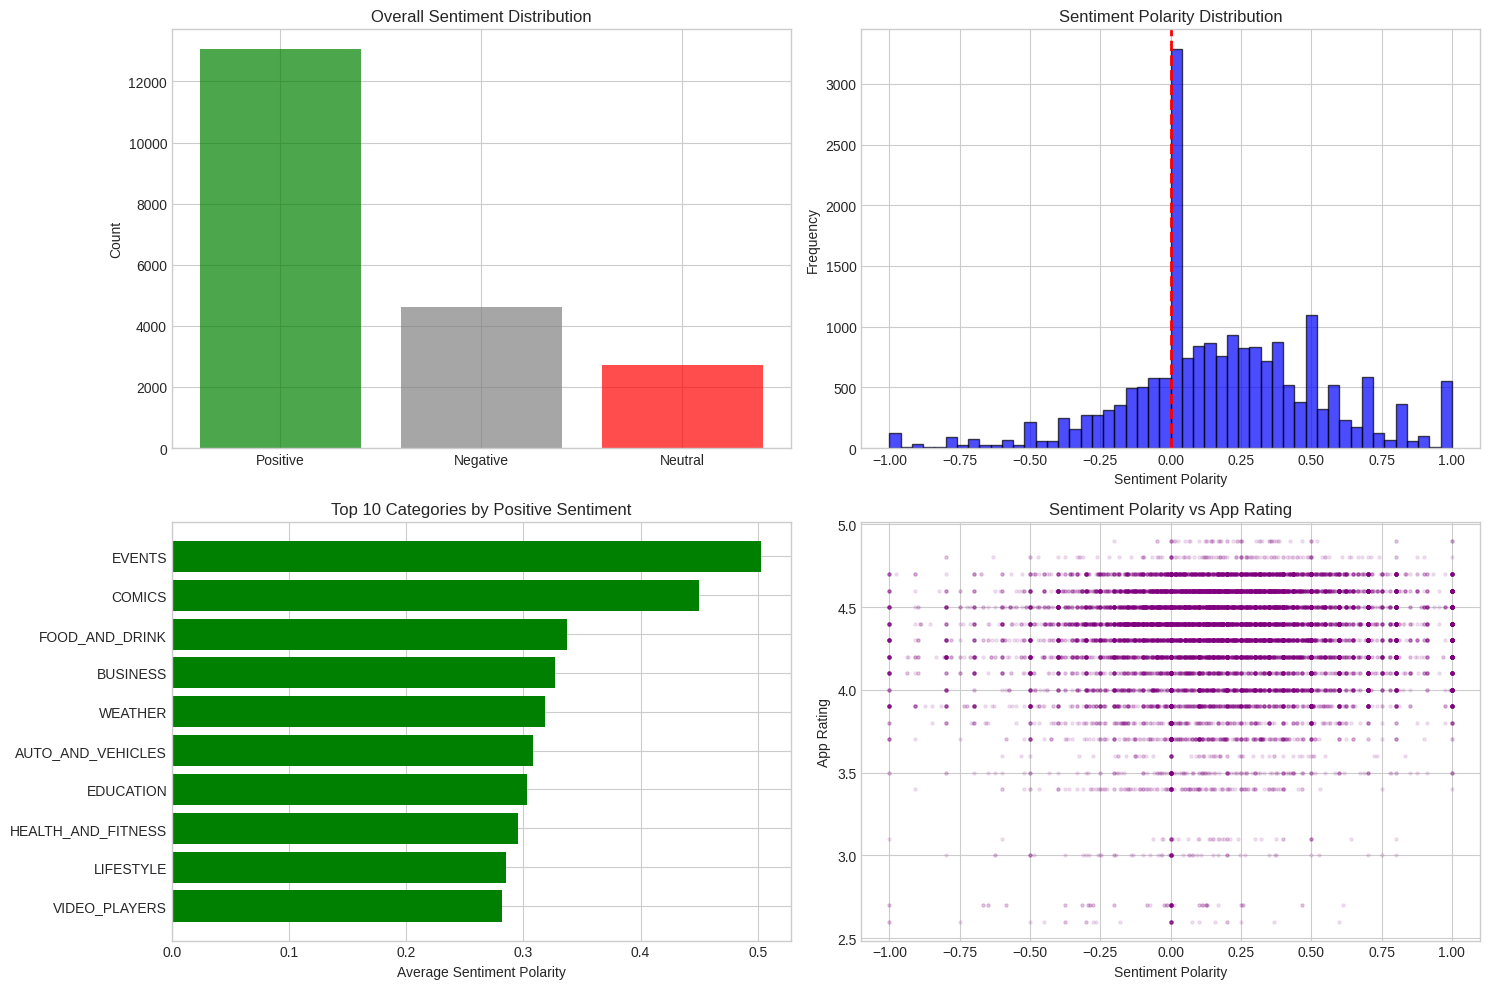


✓ Sentiment analysis visualization saved as 'sentiment_analysis.png'


In [7]:
print("\n" + "="*70)
print("SENTIMENT ANALYSIS SUMMARY")
print("="*70)

# Overall sentiment statistics
print("\n1. Overall Sentiment Distribution:")
sentiment_dist = df_reviews['Sentiment'].value_counts()
sentiment_pct = (sentiment_dist / len(df_reviews) * 100).round(2)
for sentiment, count in sentiment_dist.items():
    print(f"   {sentiment}: {count:,} ({sentiment_pct[sentiment]}%)")

# Sentiment scores
print("\n2. Sentiment Metrics:")
print(f"   Average Polarity: {df_reviews['Sentiment_Polarity'].mean():.3f}")
print(f"   Average Subjectivity: {df_reviews['Sentiment_Subjectivity'].mean():.3f}")

# Merge with apps data for category-level analysis
merged = df_reviews.merge(df_apps[['App', 'Category', 'Rating']], on='App', how='left')

# Sentiment by category
category_sentiment = merged.groupby('Category').agg({
    'Sentiment_Polarity': 'mean',
    'Sentiment_Subjectivity': 'mean',
    'Rating': 'mean'
}).round(3)

print("\n3. Top 10 Categories by Positive Sentiment:")
top_sentiment = category_sentiment.nlargest(10, 'Sentiment_Polarity')
print(top_sentiment.to_string())

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sentiment distribution
axes[0, 0].bar(sentiment_dist.index, sentiment_dist.values,
               color=['green', 'gray', 'red'], alpha=0.7)
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Overall Sentiment Distribution')

# Polarity distribution
axes[0, 1].hist(df_reviews['Sentiment_Polarity'].dropna(), bins=50,
                color='blue', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Sentiment Polarity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Sentiment Polarity Distribution')

# Top categories by sentiment
axes[1, 0].barh(range(len(top_sentiment)), top_sentiment['Sentiment_Polarity'].values, color='green')
axes[1, 0].set_yticks(range(len(top_sentiment)))
axes[1, 0].set_yticklabels(top_sentiment.index)
axes[1, 0].set_xlabel('Average Sentiment Polarity')
axes[1, 0].set_title('Top 10 Categories by Positive Sentiment')
axes[1, 0].invert_yaxis()

# Polarity vs Rating
valid_merged = merged[['Sentiment_Polarity', 'Rating']].dropna()
axes[1, 1].scatter(valid_merged['Sentiment_Polarity'], valid_merged['Rating'],
                   alpha=0.1, s=5, c='purple')
axes[1, 1].set_xlabel('Sentiment Polarity')
axes[1, 1].set_ylabel('App Rating')
axes[1, 1].set_title('Sentiment Polarity vs App Rating')

plt.tight_layout()
plt.savefig('sentiment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Sentiment analysis visualization saved as 'sentiment_analysis.png'")


### 7. Key Business Recommendations

In [8]:
print("\n" + "="*70)
print("KEY BUSINESS RECOMMENDATIONS")
print("="*70)

# 1. Top performing categories
top_categories = category_report.nlargest(5, 'Total_Installs')
print("\n1. FOCUS CATEGORIES (Highest Market Demand):")
for idx, (cat, row) in enumerate(top_categories.iterrows(), 1):
    print(f"   {idx}. {cat}")
    print(f"      • Total Installs: {row['Total_Installs']/1e9:.1f}B")
    print(f"      • Average Rating: {row['Avg_Rating']:.2f}")
    print(f"      • Success Rate: {row['Success_Rate_%']:.1f}%")

# 2. Market opportunities
print("\n2. UNTAPPED OPPORTUNITIES (High Potential, Lower Competition):")
for idx, (cat, row) in enumerate(market_opportunities.head(5).iterrows(), 1):
    print(f"   {idx}. {cat} (Opportunity Score: {row['Opportunity_Score']:.1f})")
    print(f"      • Competition: {row['App_Count']} apps")
    print(f"      • Avg Rating: {row['Avg_Rating']:.2f}")

# 3. Pricing strategy
print("\n3. PRICING STRATEGY:")
free_success = df_apps[df_apps['Type']=='Free']['Success'].mean()*100
paid_success = df_apps[df_apps['Type']=='Paid']['Success'].mean()*100
print(f"   • Free apps success rate: {free_success:.1f}%")
print(f"   • Paid apps success rate: {paid_success:.1f}%")
if paid_apps['Price'].median() > 0:
    print(f"   • Recommended price range: ${paid_apps['Price'].quantile(0.25):.2f} - ${paid_apps['Price'].quantile(0.75):.2f}")

# 4. Quality benchmarks
print("\n4. QUALITY BENCHMARKS FOR SUCCESS:")
successful_apps = df_apps[df_apps['Success'] == 1]
print(f"   • Target Rating: > {successful_apps['Rating'].quantile(0.25):.2f}")
print(f"   • Target Reviews: > {successful_apps['Reviews'].median():.0f}")
print(f"   • Target Size: ~{successful_apps['Size'].median():.0f} MB")

# 5. Update strategy
print("\n5. UPDATE STRATEGY:")
recent_updates = df_apps[df_apps['Days_Since_Update'] < 90]
old_updates = df_apps[df_apps['Days_Since_Update'] > 365]
print(f"   • Apps updated < 3 months: Avg rating {recent_updates['Rating'].mean():.2f}")
print(f"   • Apps updated > 1 year: Avg rating {old_updates['Rating'].mean():.2f}")
print(f"   • Recommendation: Update at least every 3 months")

print("\n" + "="*70)



KEY BUSINESS RECOMMENDATIONS

1. FOCUS CATEGORIES (Highest Market Demand):
   1. GAME
      • Total Installs: 13.9B
      • Average Rating: 4.25
      • Success Rate: 38.6%
   2. COMMUNICATION
      • Total Installs: 11.0B
      • Average Rating: 4.12
      • Success Rate: 32.8%
   3. TOOLS
      • Total Installs: 8.0B
      • Average Rating: 4.04
      • Success Rate: 19.4%
   4. PRODUCTIVITY
      • Total Installs: 5.8B
      • Average Rating: 4.18
      • Success Rate: 26.6%
   5. SOCIAL
      • Total Installs: 5.5B
      • Average Rating: 4.25
      • Success Rate: 28.1%

2. UNTAPPED OPPORTUNITIES (High Potential, Lower Competition):
   1. WEATHER (Opportunity Score: 94.6)
      • Competition: 72.0 apps
      • Avg Rating: 4.24
   2. EDUCATION (Opportunity Score: 94.2)
      • Competition: 118.0 apps
      • Avg Rating: 4.36
   3. FOOD_AND_DRINK (Opportunity Score: 93.8)
      • Competition: 94.0 apps
      • Avg Rating: 4.17
   4. ENTERTAINMENT (Opportunity Score: 93.5)
      • C

### 8. Final Summary Statistics

In [9]:
print("\n" + "="*70)
print("PROJECT SUMMARY STATISTICS")
print("="*70)

summary_stats = {
    'Total Apps Analyzed': len(df_apps),
    'Total User Reviews': len(df_reviews),
    'Date Range': 'Up to August 2018',
    'Categories Covered': df_apps['Category'].nunique(),
    'Average App Rating': f"{df_apps['Rating'].mean():.2f}/5.0",
    'Total Downloads': f"{df_apps['Installs'].sum()/1e9:.1f} Billion+",
    'Free Apps': f"{(df_apps['Type']=='Free').sum()} ({(df_apps['Type']=='Free').mean()*100:.1f}%)",
    'Paid Apps': f"{(df_apps['Type']=='Paid').sum()} ({(df_apps['Type']=='Paid').mean()*100:.1f}%)",
    'Success Rate': f"{df_apps['Success'].mean()*100:.1f}%",
    'Positive Reviews': f"{(df_reviews['Sentiment']=='Positive').mean()*100:.1f}%"
}

print("\n")
for key, value in summary_stats.items():
    print(f"{key:.<50} {value}")

print("\n" + "="*70)
print("✓ Analysis Complete!")
print("="*70)


PROJECT SUMMARY STATISTICS


Total Apps Analyzed............................... 8196
Total User Reviews................................ 20375
Date Range........................................ Up to August 2018
Categories Covered................................ 33
Average App Rating................................ 4.17/5.0
Total Downloads................................... 75.1 Billion+
Free Apps......................................... 7592 (92.6%)
Paid Apps......................................... 604 (7.4%)
Success Rate...................................... 20.2%
Positive Reviews.................................. 64.1%

✓ Analysis Complete!


### 9. Export All Reports

In [10]:
# Create a comprehensive Excel workbook with multiple sheets
with pd.ExcelWriter('Google_Play_Store_Complete_Analysis.xlsx', engine='openpyxl') as writer:
    # Summary statistics
    summary_df = pd.DataFrame(list(summary_stats.items()), columns=['Metric', 'Value'])
    summary_df.to_excel(writer, sheet_name='Summary', index=False)

    # Category analysis
    category_report.to_excel(writer, sheet_name='Category_Analysis')

    # Market opportunities
    market_opportunities.to_excel(writer, sheet_name='Market_Opportunities')

    # Success factors
    success_comparison.to_excel(writer, sheet_name='Success_Factors')

    # Top apps
    top_apps = df_apps.nlargest(100, 'Installs')[['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price']]
    top_apps.to_excel(writer, sheet_name='Top_100_Apps', index=False)

print("\n✓ Comprehensive report exported to 'Google_Play_Store_Complete_Analysis.xlsx'")
print("✓ All visualizations saved as PNG files")
print("\n" + "="*70)
print("PROJECT FILES GENERATED:")
print("="*70)
print("1. executive_dashboard.png")
print("2. success_factors_analysis.png")
print("3. market_opportunities.png")
print("4. sentiment_analysis.png")
print("5. Google_Play_Store_Complete_Analysis.xlsx")
print("6. category_analysis_report.xlsx")
print("7. market_opportunities_report.xlsx")
print("="*70)


✓ Comprehensive report exported to 'Google_Play_Store_Complete_Analysis.xlsx'
✓ All visualizations saved as PNG files

PROJECT FILES GENERATED:
1. executive_dashboard.png
2. success_factors_analysis.png
3. market_opportunities.png
4. sentiment_analysis.png
5. Google_Play_Store_Complete_Analysis.xlsx
6. category_analysis_report.xlsx
7. market_opportunities_report.xlsx
